Linear Model Coefficients: [2. 2. 2.]
Polynomial Model Coefficients: [-8.38218384e-15  4.61538462e-01  4.61538462e-01  4.61538462e-01
 -9.23076923e-01 -4.61538462e-01 -4.30211422e-16 -4.30211422e-16
  4.61538462e-01  9.23076923e-01]
Mean Squared Error (Linear): 1.0518145402946823e-30
Mean Squared Error (Polynomial): 1.682903264471492e-28


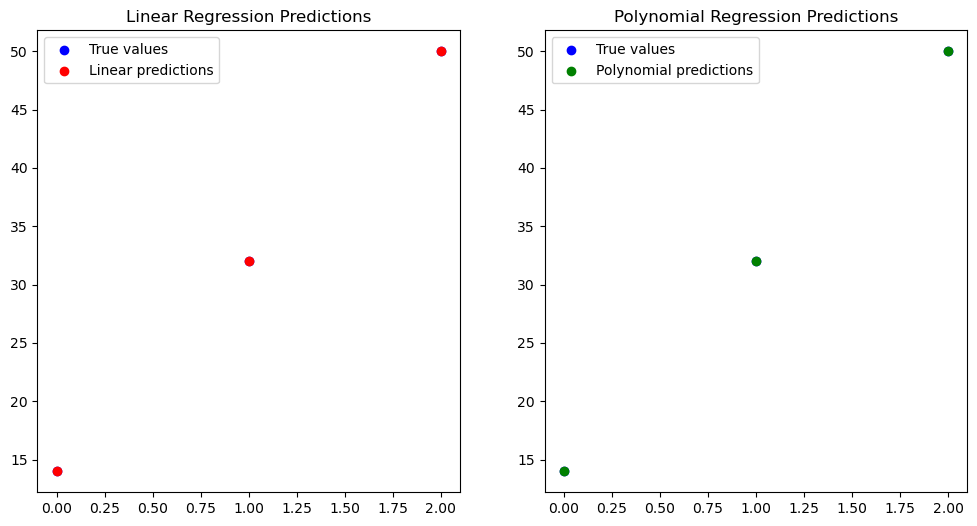

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Define training data
X_train = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
y_train = np.array([14, 32, 50])  # Example outputs

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Fit a polynomial regression model (degree 2)
poly_features = PolynomialFeatures(degree=2)
poly_model = make_pipeline(poly_features, LinearRegression())
poly_model.fit(X_train, y_train)

# Predict using both models
X_test = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
y_pred_linear = linear_model.predict(X_test)
y_pred_poly = poly_model.predict(X_test)

# Calculate Mean Squared Error for both models
mse_linear = mean_squared_error(y_train, y_pred_linear)
mse_poly = mean_squared_error(y_train, y_pred_poly)

print("Linear Model Coefficients:", linear_model.coef_)
print("Polynomial Model Coefficients:", poly_model.named_steps['linearregression'].coef_)
print("Mean Squared Error (Linear):", mse_linear)
print("Mean Squared Error (Polynomial):", mse_poly)

# Plot predictions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(y_train)), y_train, color='blue', label='True values')
plt.scatter(range(len(y_pred_linear)), y_pred_linear, color='red', label='Linear predictions')
plt.title('Linear Regression Predictions')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(range(len(y_train)), y_train, color='blue', label='True values')
plt.scatter(range(len(y_pred_poly)), y_pred_poly, color='green', label='Polynomial predictions')
plt.title('Polynomial Regression Predictions')
plt.legend()

plt.show()
